# Employee Attrition Prediction

## Competition Link
http://www.dcjingsai.com/common/cmpt/%E5%91%98%E5%B7%A5%E7%A6%BB%E8%81%8C%E9%A2%84%E6%B5%8B%E8%AE%AD%E7%BB%83%E8%B5%9B_%E7%AB%9E%E8%B5%9B%E4%BF%A1%E6%81%AF.html# 

## 1.Data Analysis

### 1.1 Import Data

In [1]:
import numpy as np
import pandas as pd

# Read Data
train = pd.read_csv(r'D:\Users\STWOOF\Documents\train.csv')
test = pd.read_csv(r'D:\Users\STWOOF\Documents\test_noLabel.csv')
print('train size:{}'.format(train.shape))
print('test size:{}'.format(test.shape))
# Check for missing values (no missing values)
print('Data Missingness：',train.isnull().any().any())

train size:(1100, 32)
test size:(350, 31)
Data Missingness： False


### 1.2 Remove Single Feature and Irrelevant Features）

In [2]:
train.drop(['ID'],axis=1,inplace=True)
test.drop(['ID'],axis=1,inplace=True)
train.drop(['Over18', 'StandardHours'],axis=1,inplace=True)
test.drop(['Over18', 'StandardHours'],axis=1,inplace=True)

### 1.3 Pyecharts Data Visualization (Version V1.0)

In [3]:
# python -m pip install pyecharts
from pyecharts.charts import Bar,Line,Grid
from pyecharts import options as opts

# Data Visualization: Observing the Features that Influence Employee Attrition
def get_charts(train,col):
    data = train.groupby([col])['Label']
    data_sum = data.sum()     # Number of Resignations
    data_mean = data.mean()   # Resignation Rate

    bar = (
        Bar()
        .add_xaxis(list(map(lambda x:str(x),data_sum.index.values)))
        .add_yaxis("Number of Resignations", data_sum.values.tolist(), markpoint_opts=['max'], color = 'rgb(42,170,227)')
        .set_global_opts(
                title_opts=opts.TitleOpts(title=col),
                yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value} Person")),
                )
        .extend_axis(
        yaxis=opts.AxisOpts(
            axislabel_opts=opts.LabelOpts(formatter="{value} %"), interval=5
            )
        )
    )
    
    line = (
        Line()
        .add_xaxis(list(map(lambda x:str(x),data_mean.index.values)))
        .add_yaxis("Resignation Rate", 
                   data_mean.values, 
                   markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max")]), 
                   markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]), 
                   label_opts = opts.LabelOpts(is_show=False),
                   yaxis_index=1)
    )
    
    bar.overlap(line)
    return bar

from pyecharts.charts import Page

page = Page()

# Storing Column Attributes Using "columns"

for col in train.columns[1:]:
    page.add(get_charts(train,col))
page.render('Pyecharts_Data_001.html')

'E:\\Jupyter Notebook Files\\Pyecharts_Data_001.html'

### 1.4 Heatmap Visualization of Correlation Coefficients

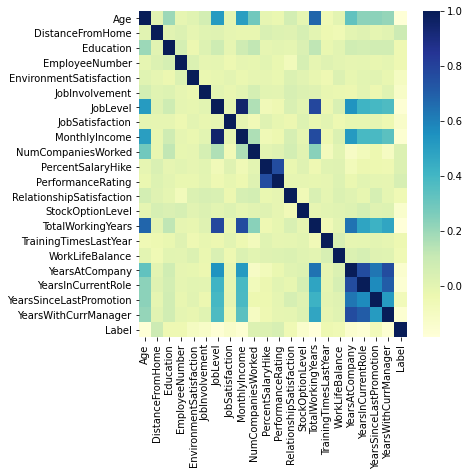

In [4]:
corr = train.corr()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(6,6))
sns.heatmap(corr,cmap='YlGnBu') 


# Removing a Feature with High Correlation Coefficient
train.drop('JobLevel',axis=1,inplace=True)
test.drop('JobLevel',axis=1,inplace=True)

## 2. Feature Engineering

In [5]:
# Feature Fusion
def creat(df):
    df['IntoAge'] = df['Age']-df['TotalWorkingYears']
    df['Satisfaction'] = df['JobSatisfaction']+df['EnvironmentSatisfaction']+df['RelationshipSatisfaction']

creat(train)
creat(test)

In [6]:
# Onehot Coding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [7]:
# Data Segmentation
def resetPerHike(s):
    if s >= 22 & s < 25:
        return 2
    elif (s >= 11 & s < 14) | (s > 14 & s < 22):
        return 1
    else:
        return 0
    
    
def resetSalary(s):
    if s>0 & s<7000:
        return 2
    elif s>=7000 & s<11250:
        return 1
    else:
        return 0
    

def resetAge(name):
    if (name < 26) & (name > 18) & (name >= 58):
        return 2
    elif (name == 18) & (name == 48) & (name == 54) & (name == 57):
        return 0
    else:
        return 1    


train['PercentSalaryHike'] = train['PercentSalaryHike'].apply(resetPerHike)
train['MonthlyIncome'] = train['MonthlyIncome'].apply(resetSalary)
train['Age'] = train['Age'].apply(resetAge)

test['PercentSalaryHike'] = test['PercentSalaryHike'].apply(resetPerHike)
test['MonthlyIncome'] = test['MonthlyIncome'].apply(resetSalary)
test['Age'] = test['Age'].apply(resetAge)

In [8]:
# Saving Processed Data
train.to_csv(r'D:\Users\STWOOF\Documents\employee_leave\train_solved.csv',index=False)
test.to_csv(r'D:\Users\STWOOF\Documents\employee_leave\test_solved.csv',index=False)
print('Data Saved')

Data Saved


## 3. Model Construction

In [9]:
# Multi-Model Cross-Validation
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
models ={
    'LR':LogisticRegression(solver='liblinear'),
    'SVM':SVC(),
    'RF':RandomForestClassifier(n_estimators=300),
}
for k,clf in models.items():
    print('Current Model： %s'%k)
    scores = cross_val_score(clf,train.iloc[:,1:],train['Label'])
    print('Average Accuracy： {}'.format(np.mean(scores)))
    print('-'*20)

Current Model： LR
Average Accuracy： 1.0
--------------------
Current Model： SVM
Average Accuracy： 0.8381818181818181
--------------------
Current Model： RF
Average Accuracy： 1.0
--------------------


In [10]:
import pandas as pd
import numpy as np
# Get Training Dataset
df_train = pd.read_csv(r'D:\Users\STWOOF\Documents\employee_leave\train_solved.csv')
df_test = pd.read_csv(r'D:\Users\STWOOF\Documents\employee_leave\test_solved.csv')

### 3.1 Random Forest Model

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=150)

rf.fit(df_train.iloc[:,1:],df_train['Label'])

rf_pred = rf.predict(df_test)
rf_pred = pd.DataFrame(rf_pred)
print(rf_pred)
rf_pred.to_csv('RF_std_pred_001.csv')

     0
0    1
1    1
2    0
3    1
4    0
..  ..
345  1
346  1
347  1
348  1
349  1

[350 rows x 1 columns]


### 3.2 Support Vector Machine (SVM) Model

In [12]:
from sklearn.svm import SVC

svc=SVC(C=1.0, 
    degree = 3, gamma = 'auto', 
    kernel = 'rbf', max_iter = -1, probability = False, 
    random_state = None, shrinking = True, tol = 0.001, verbose=False)

svc.fit(df_train.iloc[:,1:],df_train['Label'])

svc_pred = svc.predict(df_test)

svc_pred = pd.DataFrame(svc_pred)
print(svc_pred)
rf_pred.to_csv('SVC_std_pred_001.csv')

     0
0    0
1    0
2    0
3    0
4    0
..  ..
345  0
346  0
347  0
348  0
349  0

[350 rows x 1 columns]


### 3.3 Logistic Regression Model

In [13]:
# Splitting Training Set for Training, Grid Search for Optimal Parameters
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(
    df_train.iloc[:,1:],df_train['Label'],random_state=22)
params={
    'penalty':['l1', 'l2'],
    'C':np.arange(1,4.1,0.2),
}
estimator = LogisticRegression(solver='liblinear')
grid = GridSearchCV(estimator,param_grid=params,cv=10)
grid.fit(x_train,y_train)
print('Optimal parameters',grid.best_params_)
score = grid.score(x_test,y_test)
print('Highest score',score)

Optimal parameters {'C': 1.0, 'penalty': 'l1'}
Highest score 1.0


In [14]:
estimator = LogisticRegression(solver='liblinear',C=1.4,penalty='l1') # Currently the maximum is 0.9.
estimator.fit(df_train.iloc[:,1:],df_train['Label'])
pred = estimator.predict(df_test)
pred = pd.DataFrame(pred)
pred.to_csv('LR_std_pred_001.csv',index=False)